In [2]:
% load_ext autoreload
% autoreload 2

import os

path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
os.getcwd()

'/Users/samaypanwar/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Uni/FYP/FYP-Code'

In [1]:
from helper.parameterizations import VasicekModel
from helper.utils import BondPricing
from helper.synthesis import generate_grid_data, generate_pointwise_data

In [3]:
vm = VasicekModel(parameters = [0.01, 0.2, 0.2, 0.01])

In [4]:
bp = BondPricing(parameters = [0.01, .3, .02, 0.01])

In [5]:
vm(time_to_expiry = 1)

(0.0010710195758648622, -0.9063462346100909)

In [6]:
bp(time_to_expiry = 30, coupon = 0.04)

134.98538716330043

r ̄ = 0.042994 (0.0080023) κ = 0.162953 (0.053703)
σ = 0.015384 (0.00099592).


In [7]:
vm(time_to_expiry = 1)

(0.0010710195758648622, -0.9063462346100909)

In [8]:
0.042994 / 0.162953

0.26384294858026547

In [9]:
generate_pointwise_data()

100%|██████████| 60000/60000 [00:00<00:00, 216752.80it/s]


Data successfully generated!


In [10]:
from analysis.pointwise.model import load_data, init_model, train_model

In [11]:
params_range_train, params_range_test, price_train, price_test = load_data()

In [12]:
model = init_model()

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  224       
                                                                 
 dense_1 (Dense)             multiple                  1056      
                                                                 
 batch_normalization (BatchN  multiple                 128       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             multiple                  1056      
                                                                 
 dense_3 (Dense)             multiple                  33        
                                                                 
Total params: 2,497
Trainable params: 2,433
Non-trainable params: 64
____________________________________________________

2023-02-01 19:04:54,584 | INFO: | model.py | train_model | 222: Beginning training for model dense with vasicek
2023-02-01 19:04:54,584 | INFO: | model.py | train_model | 222: Beginning training for model dense with vasicek


100%|██████████| 200/200 [02:17<00:00,  1.45it/s]

2023-02-01 19:07:12,553 | INFO: | model.py | train_model | 271: Saved weights to file: weights/pointwise/pointwise_weights_dense_vasicek.h5
2023-02-01 19:07:12,553 | INFO: | model.py | train_model | 271: Saved weights to file: weights/pointwise/pointwise_weights_dense_vasicek.h5



/Users/samaypanwar/.local/share/virtualenvs/FYP-Code-CTZTREBR/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/samaypanwar/.local/share/virtualenvs/FYP-Code-CTZTREBR/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


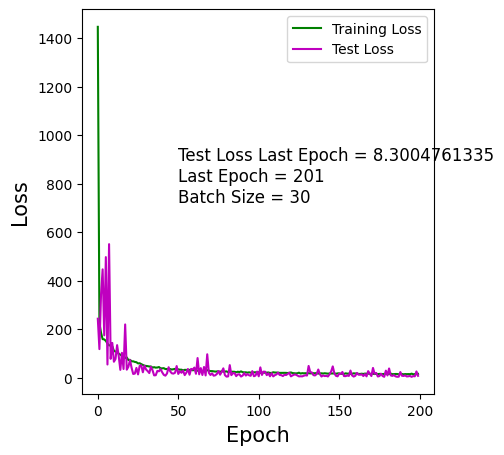

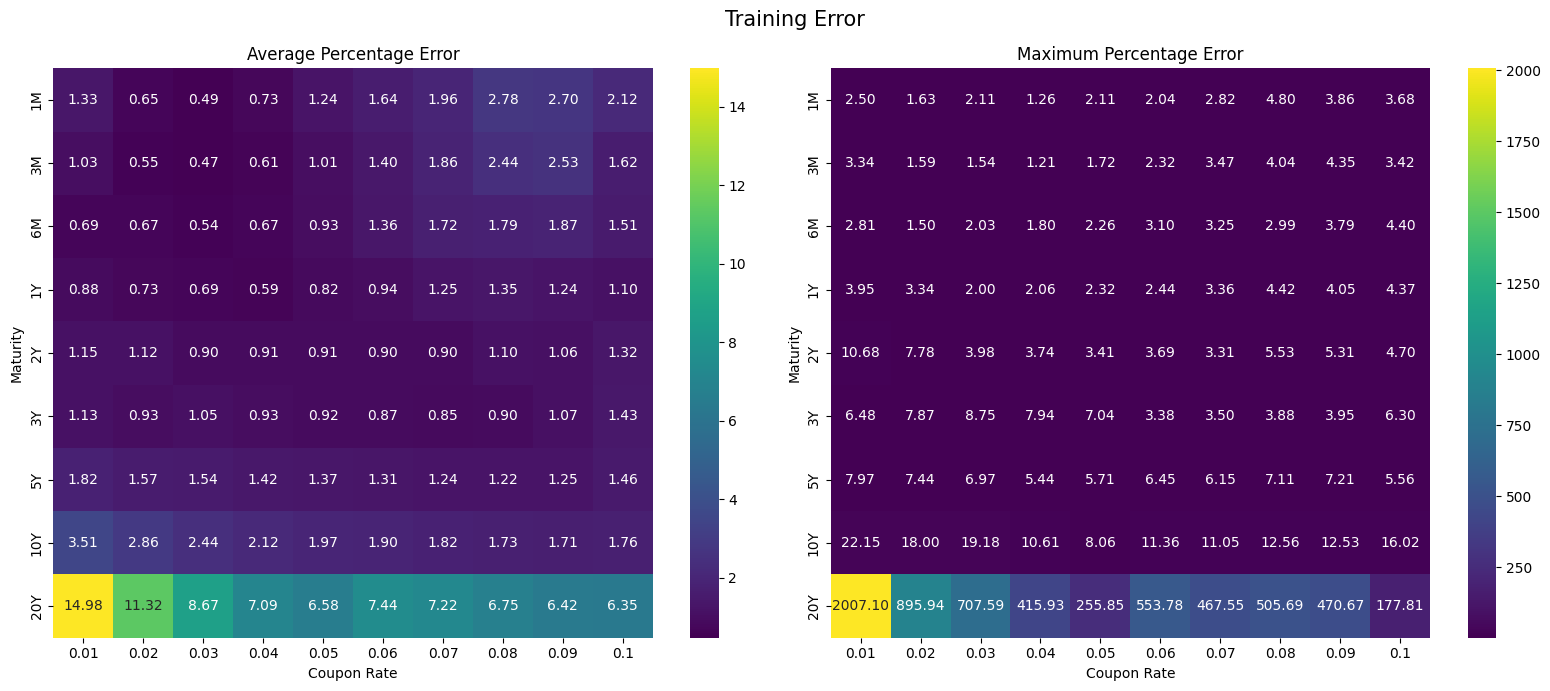

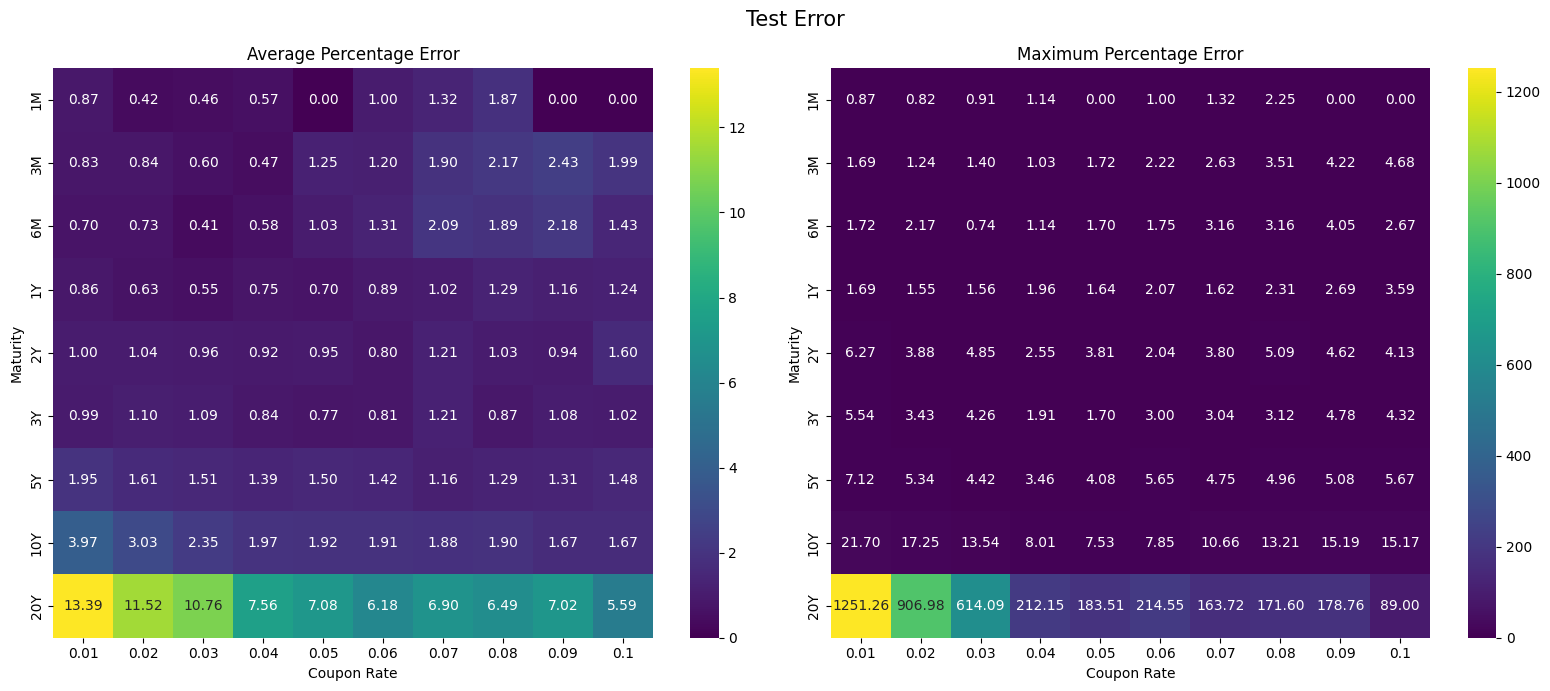

In [13]:
train_model(model = model, epochs = 200, plot = True)

In [61]:
from analysis.pointwise.model import _try_plotting_

/Users/samaypanwar/.local/share/virtualenvs/FYP-Code-CTZTREBR/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/samaypanwar/.local/share/virtualenvs/FYP-Code-CTZTREBR/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


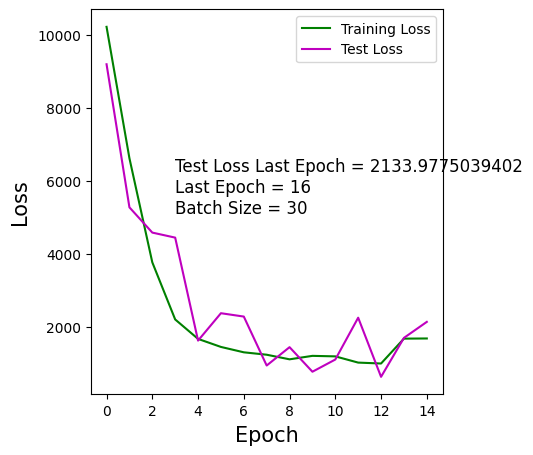

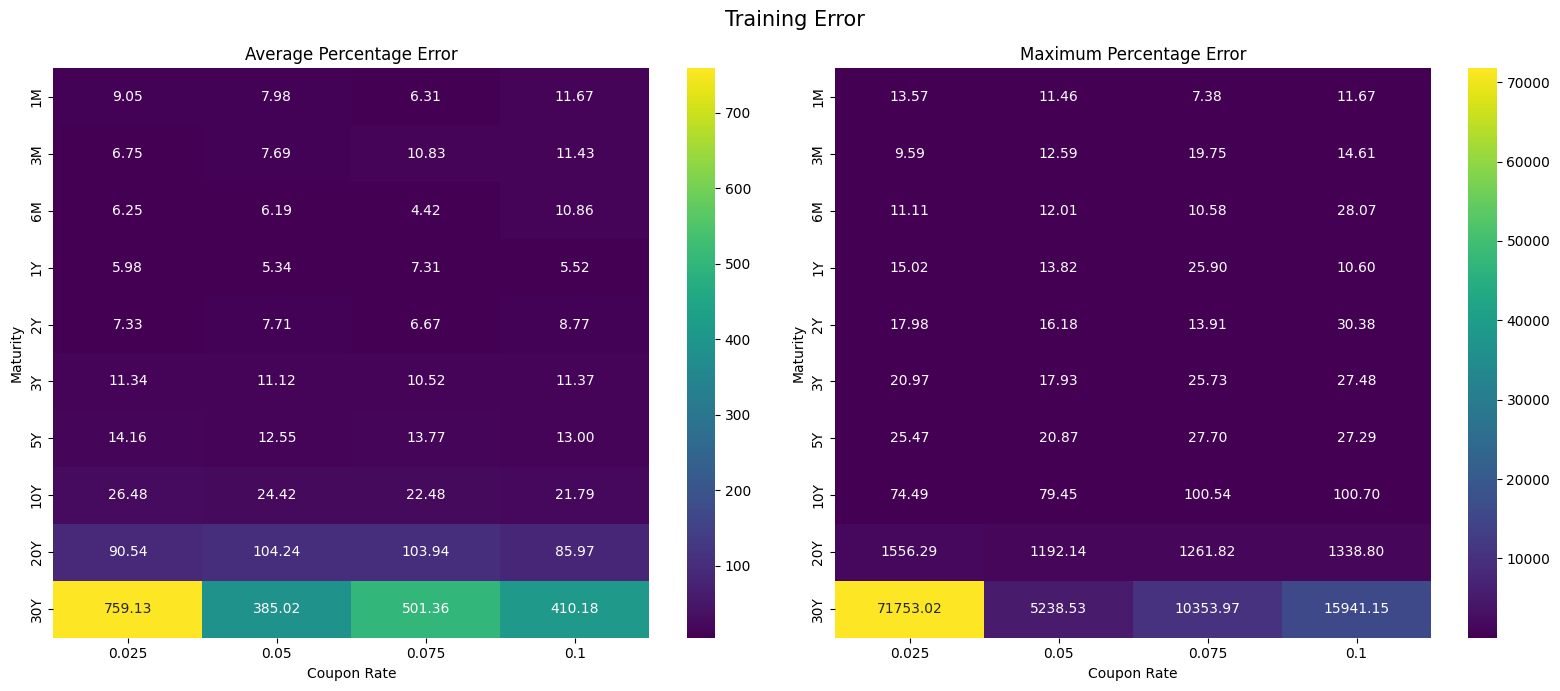

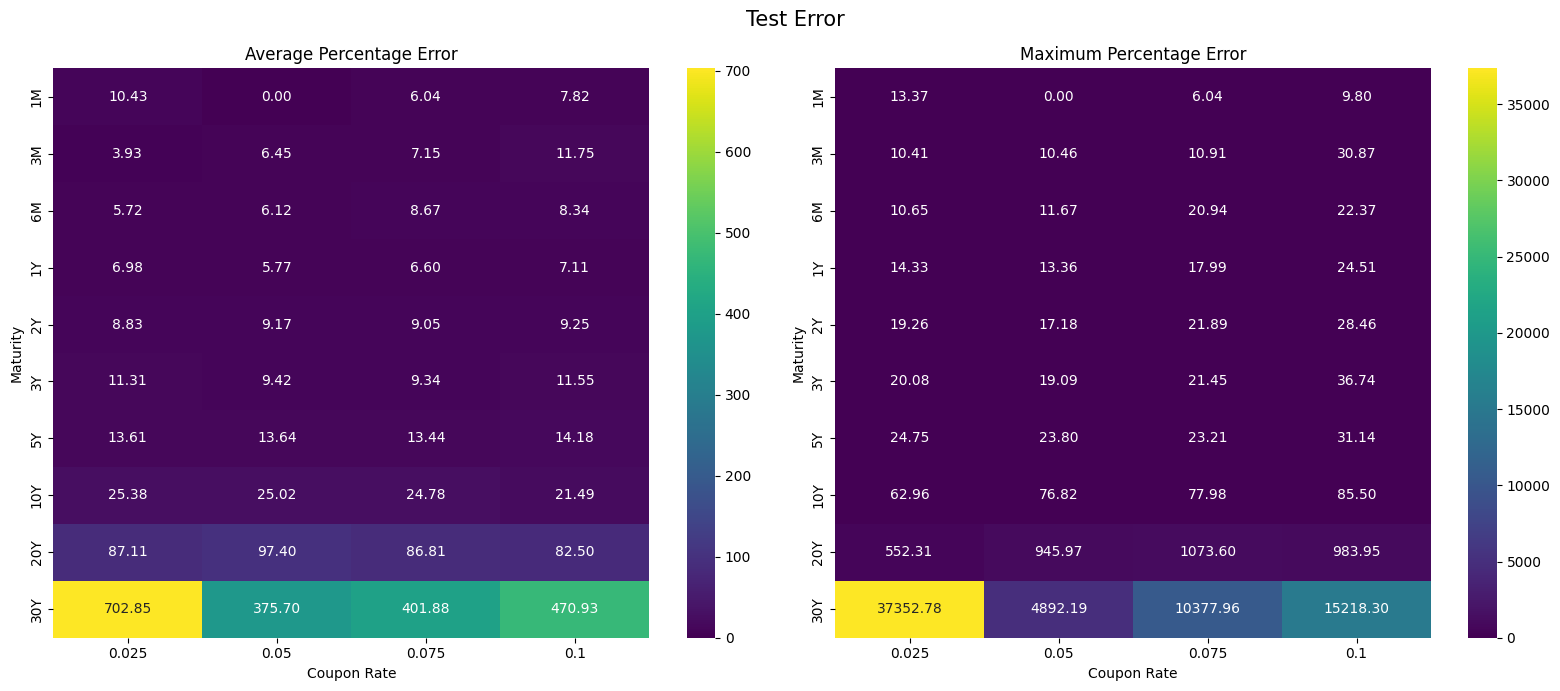

In [117]:
_try_plotting_(
    model = model, test_loss = test_loss, test_loss_vec = test_loss_vec, train_loss_vec = train_loss_vec, epochs = 15
    )

In [54]:
bp = BondPricing(parameters = [params_range_train[5, 0], params_range_train[5, 1], 0.02, params_range_train[5, 4]])

In [55]:
bp(time_to_expiry = params_range_train[5, 3], coupon = params_range_train[5, 2])

268.4872663668871

In [14]:
generate_grid_data()

100%|██████████| 60000/60000 [00:25<00:00, 2398.09it/s]


Data successfully generated!


In [15]:
from analysis.pointwise.model import calibrate

2023-02-01 19:37:20,075 | INFO: | model.py | calibrate | 659: Beginning calibration for model dense with vasicek
2023-02-01 19:37:20,075 | INFO: | model.py | calibrate | 659: Beginning calibration for model dense with vasicek


100%|██████████| 100/100 [01:27<00:00,  1.15it/s]

2023-02-01 19:38:47,389 | INFO: | model.py | calibrate | 691: Calibration complete! change in parameters: 4.892619660333644
2023-02-01 19:38:47,389 | INFO: | model.py | calibrate | 691: Calibration complete! change in parameters: 4.892619660333644
2023-02-01 19:38:47,391 | INFO: | model.py | calibrate | 695: Saved parameters to file: data/pointwise/pointwise_params_calibrated_dense_vasicek.dat
2023-02-01 19:38:47,391 | INFO: | model.py | calibrate | 695: Saved parameters to file: data/pointwise/pointwise_params_calibrated_dense_vasicek.dat


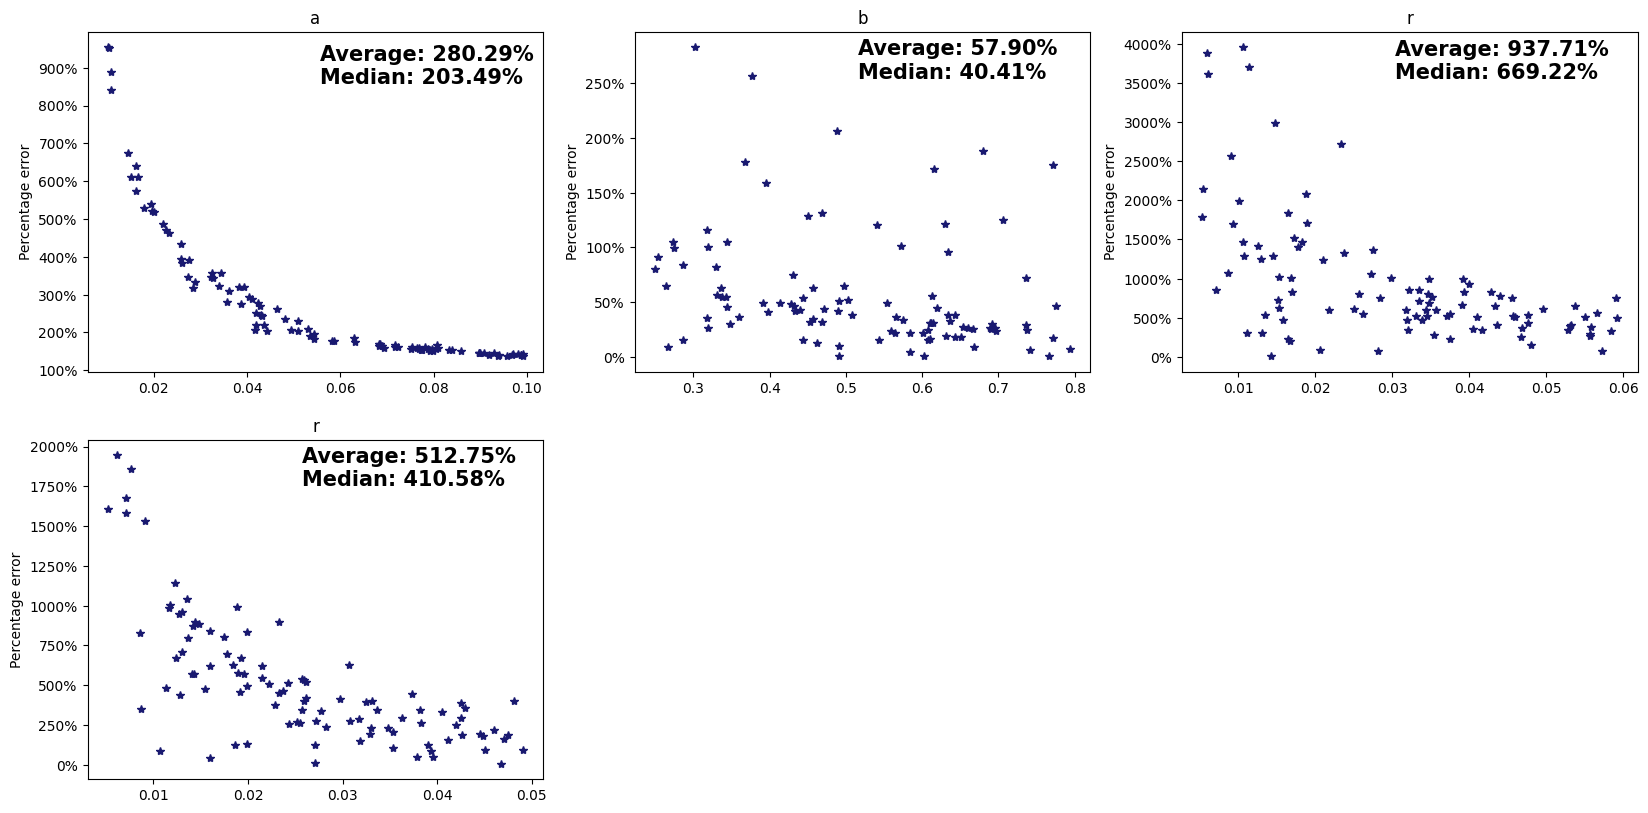

In [21]:
calibrate(model = model, prices = price_test, calibration_size = 100, epochs = 1000, plot = True)

In [15]:
import numpy as np

np.round(np.linspace(start = 0, stop = 0.1, num = 11), 4)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [15]:
model.predict(params_range_test)[:, -1, :]

157/157 [==============================] - 1s 2ms/step


array([[ 4.81615942e+00,  9.85661603e+00,  2.16624384e+01,
         4.71247225e+01,  1.03852451e+02],
       [ 1.80260144e+01,  3.73525037e+01,  7.85217181e+01,
         1.61958911e+02,  3.31782381e+02],
       [ 1.32303442e+00,  3.20093400e+00,  6.26306458e+00,
         1.48326959e+01,  3.31530438e+01],
       ...,
       [ 1.52837090e+00,  2.52340764e+00,  5.67380803e+00,
         1.28678554e+01,  2.94017499e+01],
       [-3.75813852e-01, -4.93698964e-01, -1.97052857e-01,
        -3.16785925e+00, -1.01960761e+01],
       [ 5.04717577e+00,  1.08180650e+01,  2.32342788e+01,
         5.21468917e+01,  1.14095358e+02]])

In [16]:
from analysis.gridbased.model import calibrate

In [17]:
params_range_train, params_range_test, price_train, price_test = load_data()


In [18]:
model.summary()

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  160       
                                                                 
 dense_1 (Dense)             multiple                  1056      
                                                                 
 batch_normalization (BatchN  multiple                 128       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             multiple                  1056      
                                                                 
 dense_3 (Dense)             multiple                  1650      
                                                                 
 reshape (Reshape)           multiple                  0         
                                                       

2023-01-27 21:01:07,789 | INFO: | model.py | calibrate | 425: Beginning calibration for model dense with vasicek


100%|██████████| 10/10 [00:00<00:00, 12.40it/s]

2023-01-27 21:01:08,601 | INFO: | model.py | calibrate | 451: Calibration complete! change in parameters: 1.2680507910561458
2023-01-27 21:01:08,629 | INFO: | model.py | calibrate | 455: Saved parameters to file: data/gridbased/gridbased_params_calibrated_dense_vasicek.dat


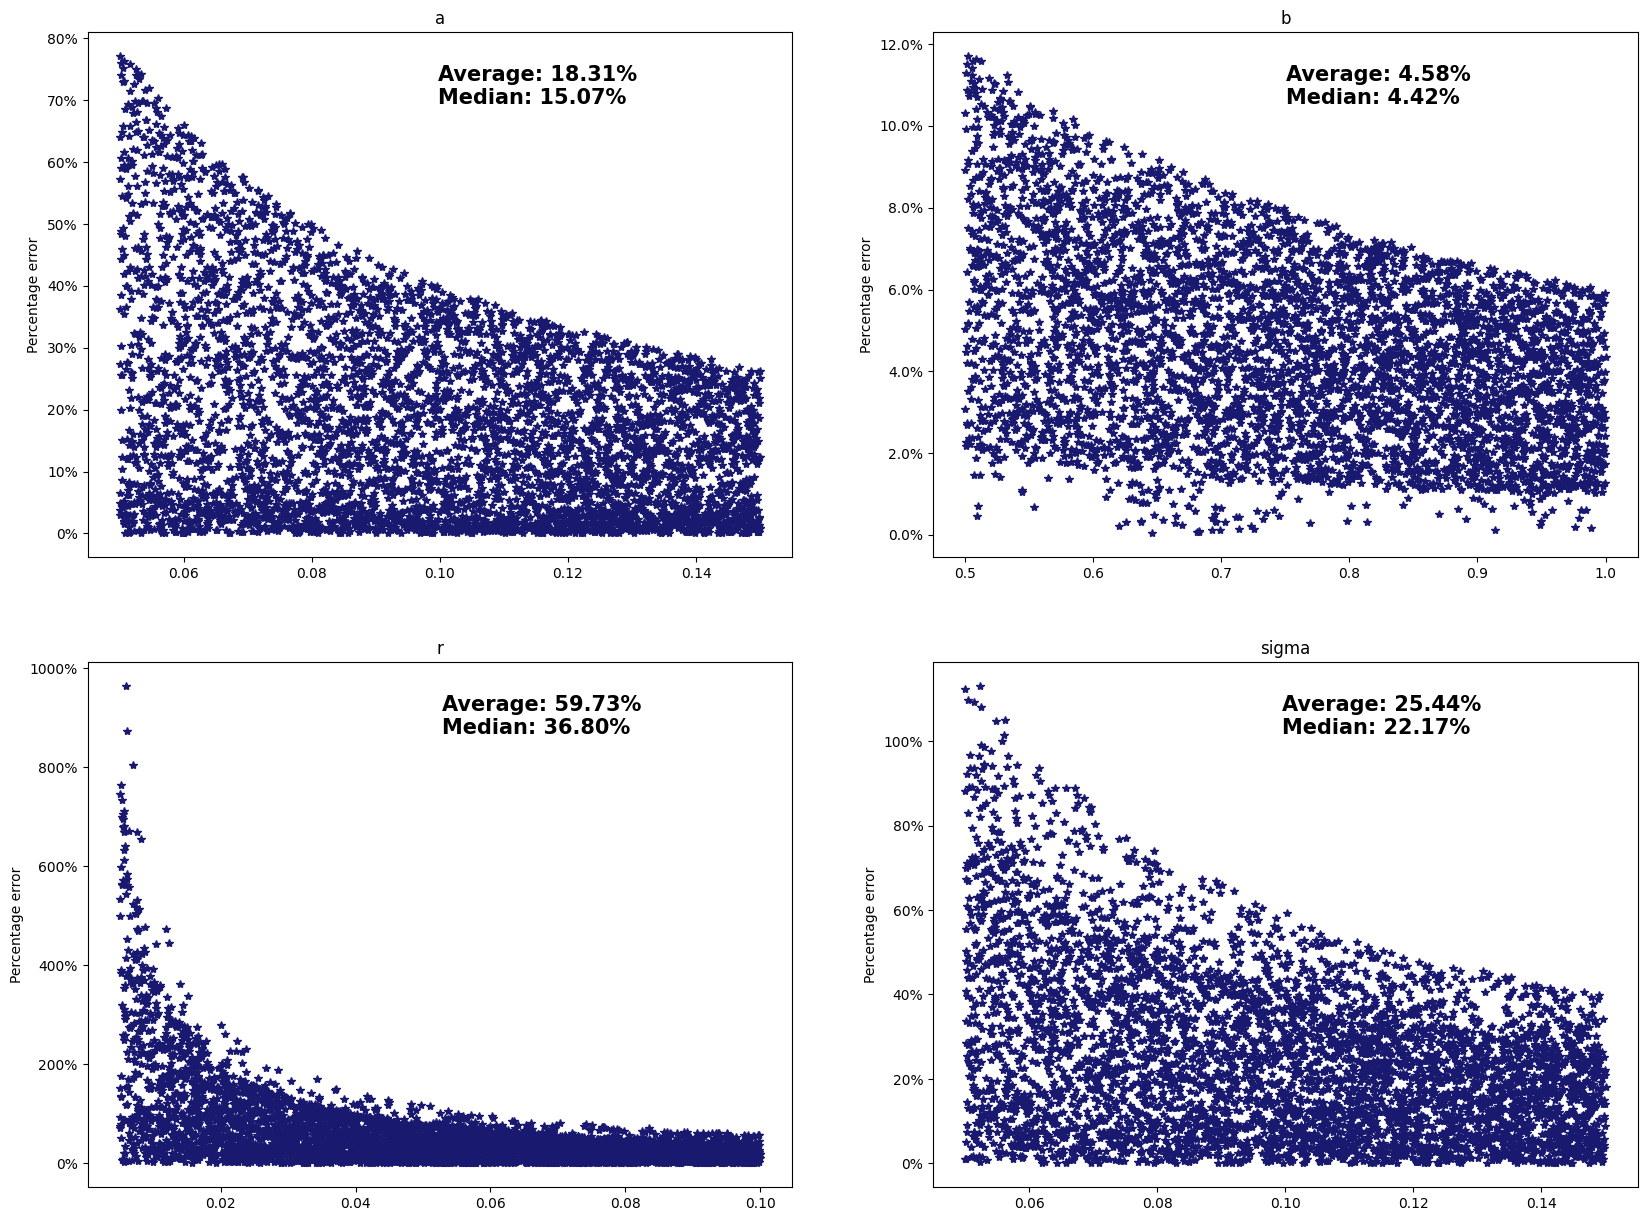

In [19]:
calibrate(model = model, prices = price_test, parameters = params_range_test, plot = True, epochs = 10)

In [ ]:
a, b, r, sigma, P

In [ ]:

a = 0.2638
b = 0.12953  #(0.053703)
sigma = 0.015384  #(0.00099592)
r = 0.02


In [ ]:
import numpy as np
from tqdm import tqdm
import random

a_list = np.linspace(0, 0.2, 500)
b_list = np.linspace(0.001, 1, 500)
sigma_list = np.linspace(0.1, 0.2, 500)
r_list = np.linspace(0.001, 0.07, 500)
maturities = np.linspace(0.1, 30, 500)
random.shuffle(maturities)
random.shuffle(r_list)

sigma_result = []
for sigma_hat, tau in tqdm(zip(sigma_list, maturities)):

    bp = BondPricing(parameters = [a, b, sigma_hat, r])
    price = bp(tau)
    sigma_result.append(price)


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
    a_list, maturities, a_result,
    cmap = 'viridis', edgecolor = 'none'
    );

ax.set_title('Sensitivity Analysis: a');

ax.set_xlabel('a')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 250, 0)


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
    b_list, maturities, b_result,
    cmap = 'viridis', edgecolor = 'none'
    );

ax.set_title('Sensitivity Analysis: b');

ax.set_xlabel('b')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 270, 0)


In [ ]:
sigma_result

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
    sigma_list, maturities, sigma_result,
    cmap = 'viridis', edgecolor = 'none'
    );

ax.set_title('Sensitivity Analysis: sigma');

ax.set_xlabel('sigma')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 170, 0)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
    r_list, maturities, r_result,
    cmap = 'viridis', edgecolor = 'none'
    );

ax.set_title('Sensitivity Analysis: r');

ax.set_xlabel('r')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 0, 0)

p is decreasing in r
increasing in sigma
decreasing in a

In [ ]:
from analysis.gridbased.model import calibrate

In [ ]:
params_range_train, params_range_test, price_train, price_test = load_data()


In [ ]:
model.summary()

In [ ]:
calibrate(model = model, prices = price_test, parameters = params_range_test, plot = True)

In [ ]:
% load_ext autoreload
% autoreload 2

import os

path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
os.getcwd()

In [ ]:
from helper.parameterizations import VasicekModel
from helper.utils import BondPricing
from helper.synthesis import generate_grid_data, generate_pointwise_data

In [ ]:
vm = VasicekModel(parameters = [0.01, 0.2, 0.2, 0.01])

In [ ]:
bp = BondPricing(parameters = [0.01, .3, .2, 0.01])

In [ ]:
bp(1)

r ̄ = 0.042994 (0.0080023) κ = 0.162953 (0.053703)
σ = 0.015384 (0.00099592).


In [ ]:
vm(1)

In [ ]:
0.042994 / 0.162953

In [ ]:
generate_grid_data()

In [ ]:
generate_pointwise_data()

In [ ]:
from analysis.gridbased.model import load_data, init_model, train_model

In [ ]:
model = init_model()

In [ ]:
train_model(model = model, epochs = 100)

In [ ]:
a, b, r, sigma, P

In [ ]:

a = 0.2638
b = 0.12953  #(0.053703)
sigma = 0.015384  #(0.00099592)
r = 0.02


In [ ]:
import numpy as np
from tqdm import tqdm
import random

a_list = np.linspace(0, 0.2, 500)
b_list = np.linspace(0.001, 1, 500)
sigma_list = np.linspace(0.1, 0.2, 500)
r_list = np.linspace(0.001, 0.07, 500)
maturities = np.linspace(0.1, 30, 500)
random.shuffle(maturities)
random.shuffle(r_list)

sigma_result = []
for sigma_hat, tau in tqdm(zip(sigma_list, maturities)):

    bp = BondPricing(parameters = [a, b, sigma_hat, r])
    price = bp(tau)
    sigma_result.append(price)


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
    a_list, maturities, a_result,
    cmap = 'viridis', edgecolor = 'none'
    );

ax.set_title('Sensitivity Analysis: a');

ax.set_xlabel('a')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 250, 0)


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
    b_list, maturities, b_result,
    cmap = 'viridis', edgecolor = 'none'
    );

ax.set_title('Sensitivity Analysis: b');

ax.set_xlabel('b')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 270, 0)


In [ ]:
sigma_result

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
    sigma_list, maturities, sigma_result,
    cmap = 'viridis', edgecolor = 'none'
    );

ax.set_title('Sensitivity Analysis: sigma');

ax.set_xlabel('sigma')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 170, 0)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
    r_list, maturities, r_result,
    cmap = 'viridis', edgecolor = 'none'
    );

ax.set_title('Sensitivity Analysis: r');

ax.set_xlabel('r')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 0, 0)

p is decreasing in r
increasing in sigma
decreasing in a

In [ ]:
from analysis.gridbased.model import calibrate

In [ ]:
params_range_train, params_range_test, price_train, price_test = load_data()


In [ ]:
model.summary()

In [ ]:
calibrate(model = model, prices = price_test, parameters = params_range_test, plot = True)

In [2]:
from helper.parameterizations import VasicekModel
from helper.utils import BondPricing
from helper.synthesis import generate_grid_data, generate_pointwise_data

In [27]:
vm = VasicekModel(parameters = [0.01, 0.2, 0.2, 0.01])

In [30]:
bp = BondPricing(parameters = [0.01, .3, .2, 0.01])

In [32]:
bp(1)

99.22117535608255

r ̄ = 0.042994 (0.0080023) κ = 0.162953 (0.053703)
σ = 0.015384 (0.00099592).


In [29]:
vm(1)

(0.0010710195758648622, -0.9063462346100909)

In [6]:
0.042994 / 0.162953

0.26384294858026547

In [33]:
generate_grid_data()

100%|██████████| 44000/44000 [00:03<00:00, 11125.48it/s]


Data successfully generated!


In [34]:
generate_pointwise_data()

100%|██████████| 44000/44000 [00:00<00:00, 141907.57it/s]


Data successfully generated!


In [9]:
from analysis.gridbased.model import load_data, init_model, train_model

In [35]:
model = init_model()

Model: "dense_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             multiple                  150       
                                                                 
 dense_5 (Dense)             multiple                  930       
                                                                 
 dense_6 (Dense)             multiple                  930       
                                                                 
 dense_7 (Dense)             multiple                  403       
                                                                 
Total params: 2,413
Trainable params: 2,413
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


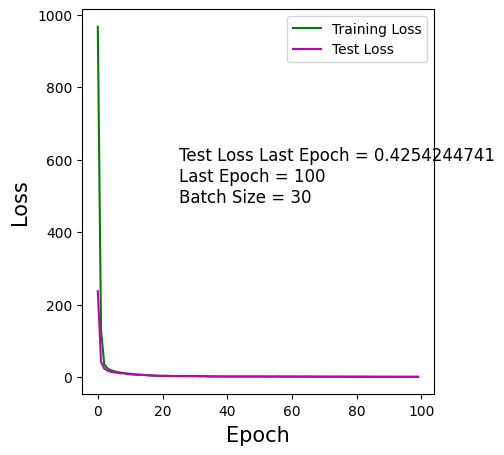

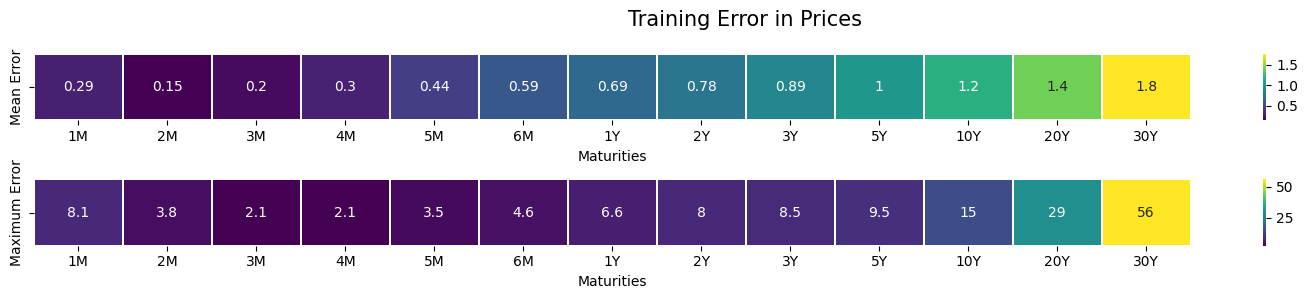

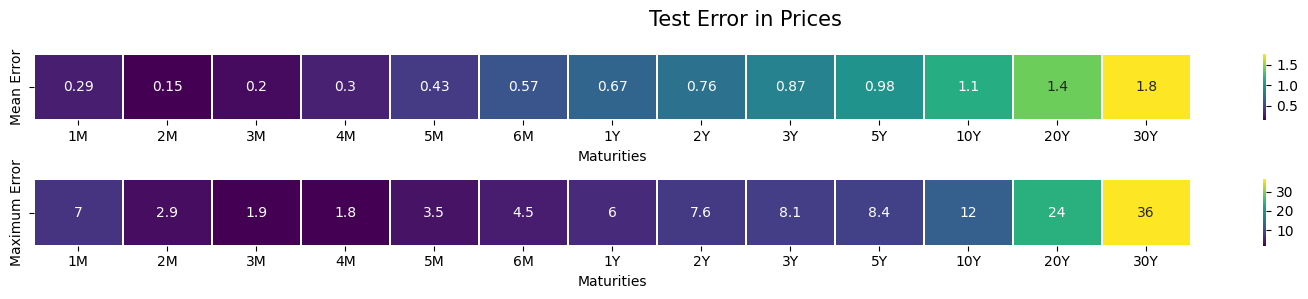

In [36]:
train_model(model = model, epochs = 100)

In [ ]:
a, b, r, sigma, P

In [37]:

a = 0.2638
b = 0.12953  #(0.053703)
sigma = 0.015384  #(0.00099592)
r = 0.02


In [38]:
import numpy as np
from tqdm import tqdm
import random

a_list = np.linspace(0, 0.2, 500)
b_list = np.linspace(0.001, 1, 500)
sigma_list = np.linspace(0.1, 0.2, 500)
r_list = np.linspace(0.001, 0.07, 500)
maturities = np.linspace(0.1, 30, 500)
random.shuffle(maturities)
random.shuffle(r_list)

sigma_result = []
for sigma_hat, tau in tqdm(zip(sigma_list, maturities)):

    bp = BondPricing(parameters = [a, b, sigma_hat, r])
    price = bp(tau)
    sigma_result.append(price)


500it [00:00, 145736.76it/s]


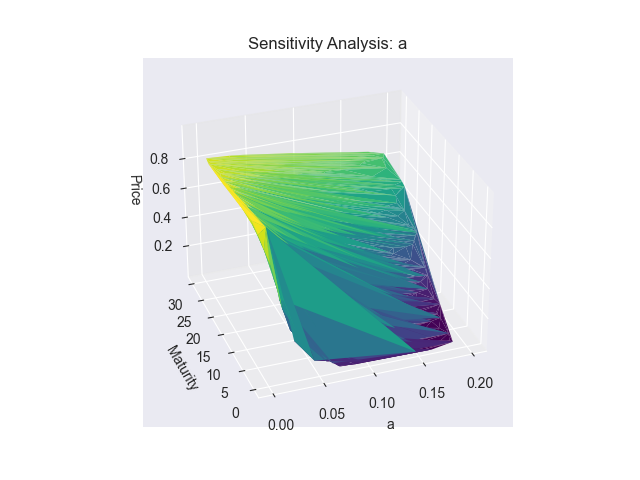

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
    a_list, maturities, a_result,
    cmap = 'viridis', edgecolor = 'none'
    );

ax.set_title('Sensitivity Analysis: a');

ax.set_xlabel('a')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 250, 0)


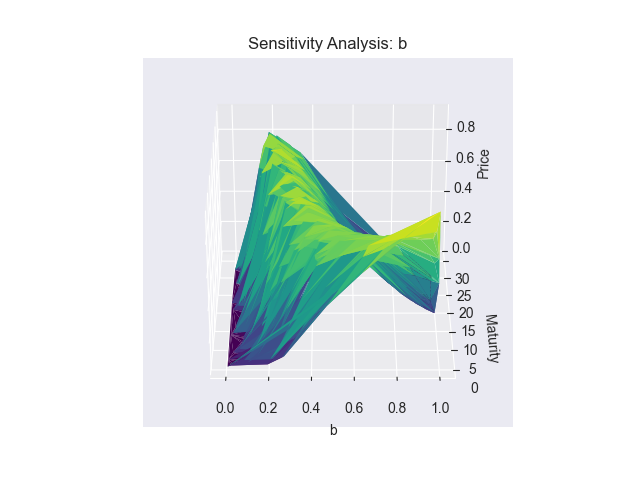

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
    b_list, maturities, b_result,
    cmap = 'viridis', edgecolor = 'none'
    );

ax.set_title('Sensitivity Analysis: b');

ax.set_xlabel('b')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 270, 0)


In [39]:
sigma_result

[17.790860713321738,
 5.554962584283507e-10,
 98.44631068218915,
 82.39670102793906,
 2.297324400191782e-05,
 9.483720953797857e-15,
 2.7969142895152026e-06,
 1.5181373695971002e-13,
 8.809290590199165e-16,
 77.81768239093965,
 1.2491343458455789e-15,
 2.532330239314922e-07,
 1.5156114913755648e-12,
 2.1021570341072767e-09,
 57.992100717212466,
 5.168332791072457e-09,
 5.592945007915553e-05,
 2.476318689976235e-08,
 0.6471704548227936,
 0.5275868020716602,
 6.4538415968515155,
 4.8700230835856094e-14,
 7.239124403491847e-12,
 4.144456950071463e-10,
 6.3079786127104305e-15,
 0.06999180155942125,
 3.9209503577951503e-10,
 4.774818299082982e-06,
 5.6341820555207255e-15,
 6.354996643744389e-07,
 7.970596429317975e-05,
 9.927251258976963e-08,
 7.037777526482131e-12,
 5.791766333569586e-10,
 0.06151337921124082,
 3.8448192081951506e-07,
 0.00010776513083444966,
 7.259124376181881e-08,
 4.0858771409684533e-13,
 4.1520124010863055,
 3.528579083535998e-08,
 0.09118938109210178,
 83.884806453128

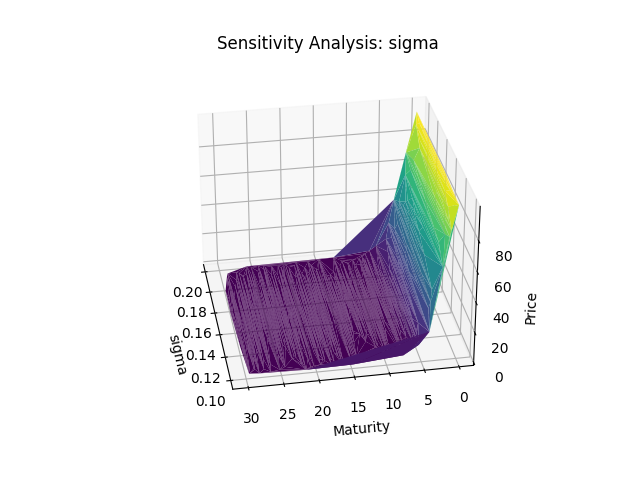

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
    sigma_list, maturities, sigma_result,
    cmap = 'viridis', edgecolor = 'none'
    );

ax.set_title('Sensitivity Analysis: sigma');

ax.set_xlabel('sigma')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 170, 0)

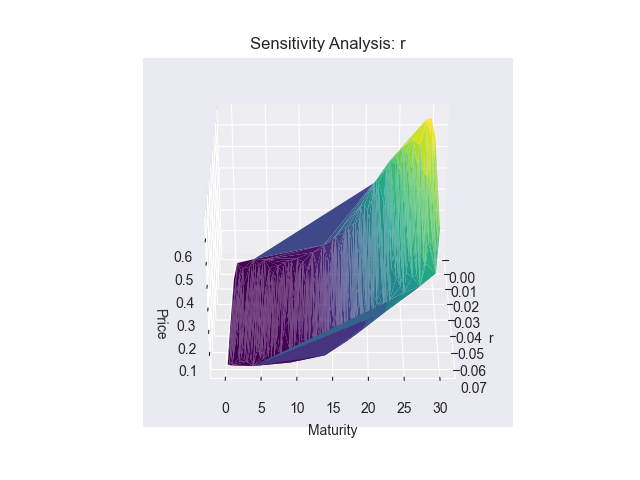

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
    r_list, maturities, r_result,
    cmap = 'viridis', edgecolor = 'none'
    );

ax.set_title('Sensitivity Analysis: r');

ax.set_xlabel('r')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 0, 0)

p is decreasing in r
increasing in sigma
decreasing in a

In [43]:
from analysis.gridbased.model import calibrate

In [44]:
params_range_train, params_range_test, price_train, price_test = load_data()


In [45]:
model.summary()

Model: "dense_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             multiple                  150       
                                                                 
 dense_5 (Dense)             multiple                  930       
                                                                 
 dense_6 (Dense)             multiple                  930       
                                                                 
 dense_7 (Dense)             multiple                  403       
                                                                 
Total params: 2,413
Trainable params: 2,413
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [00:08<00:00, 124.57it/s]


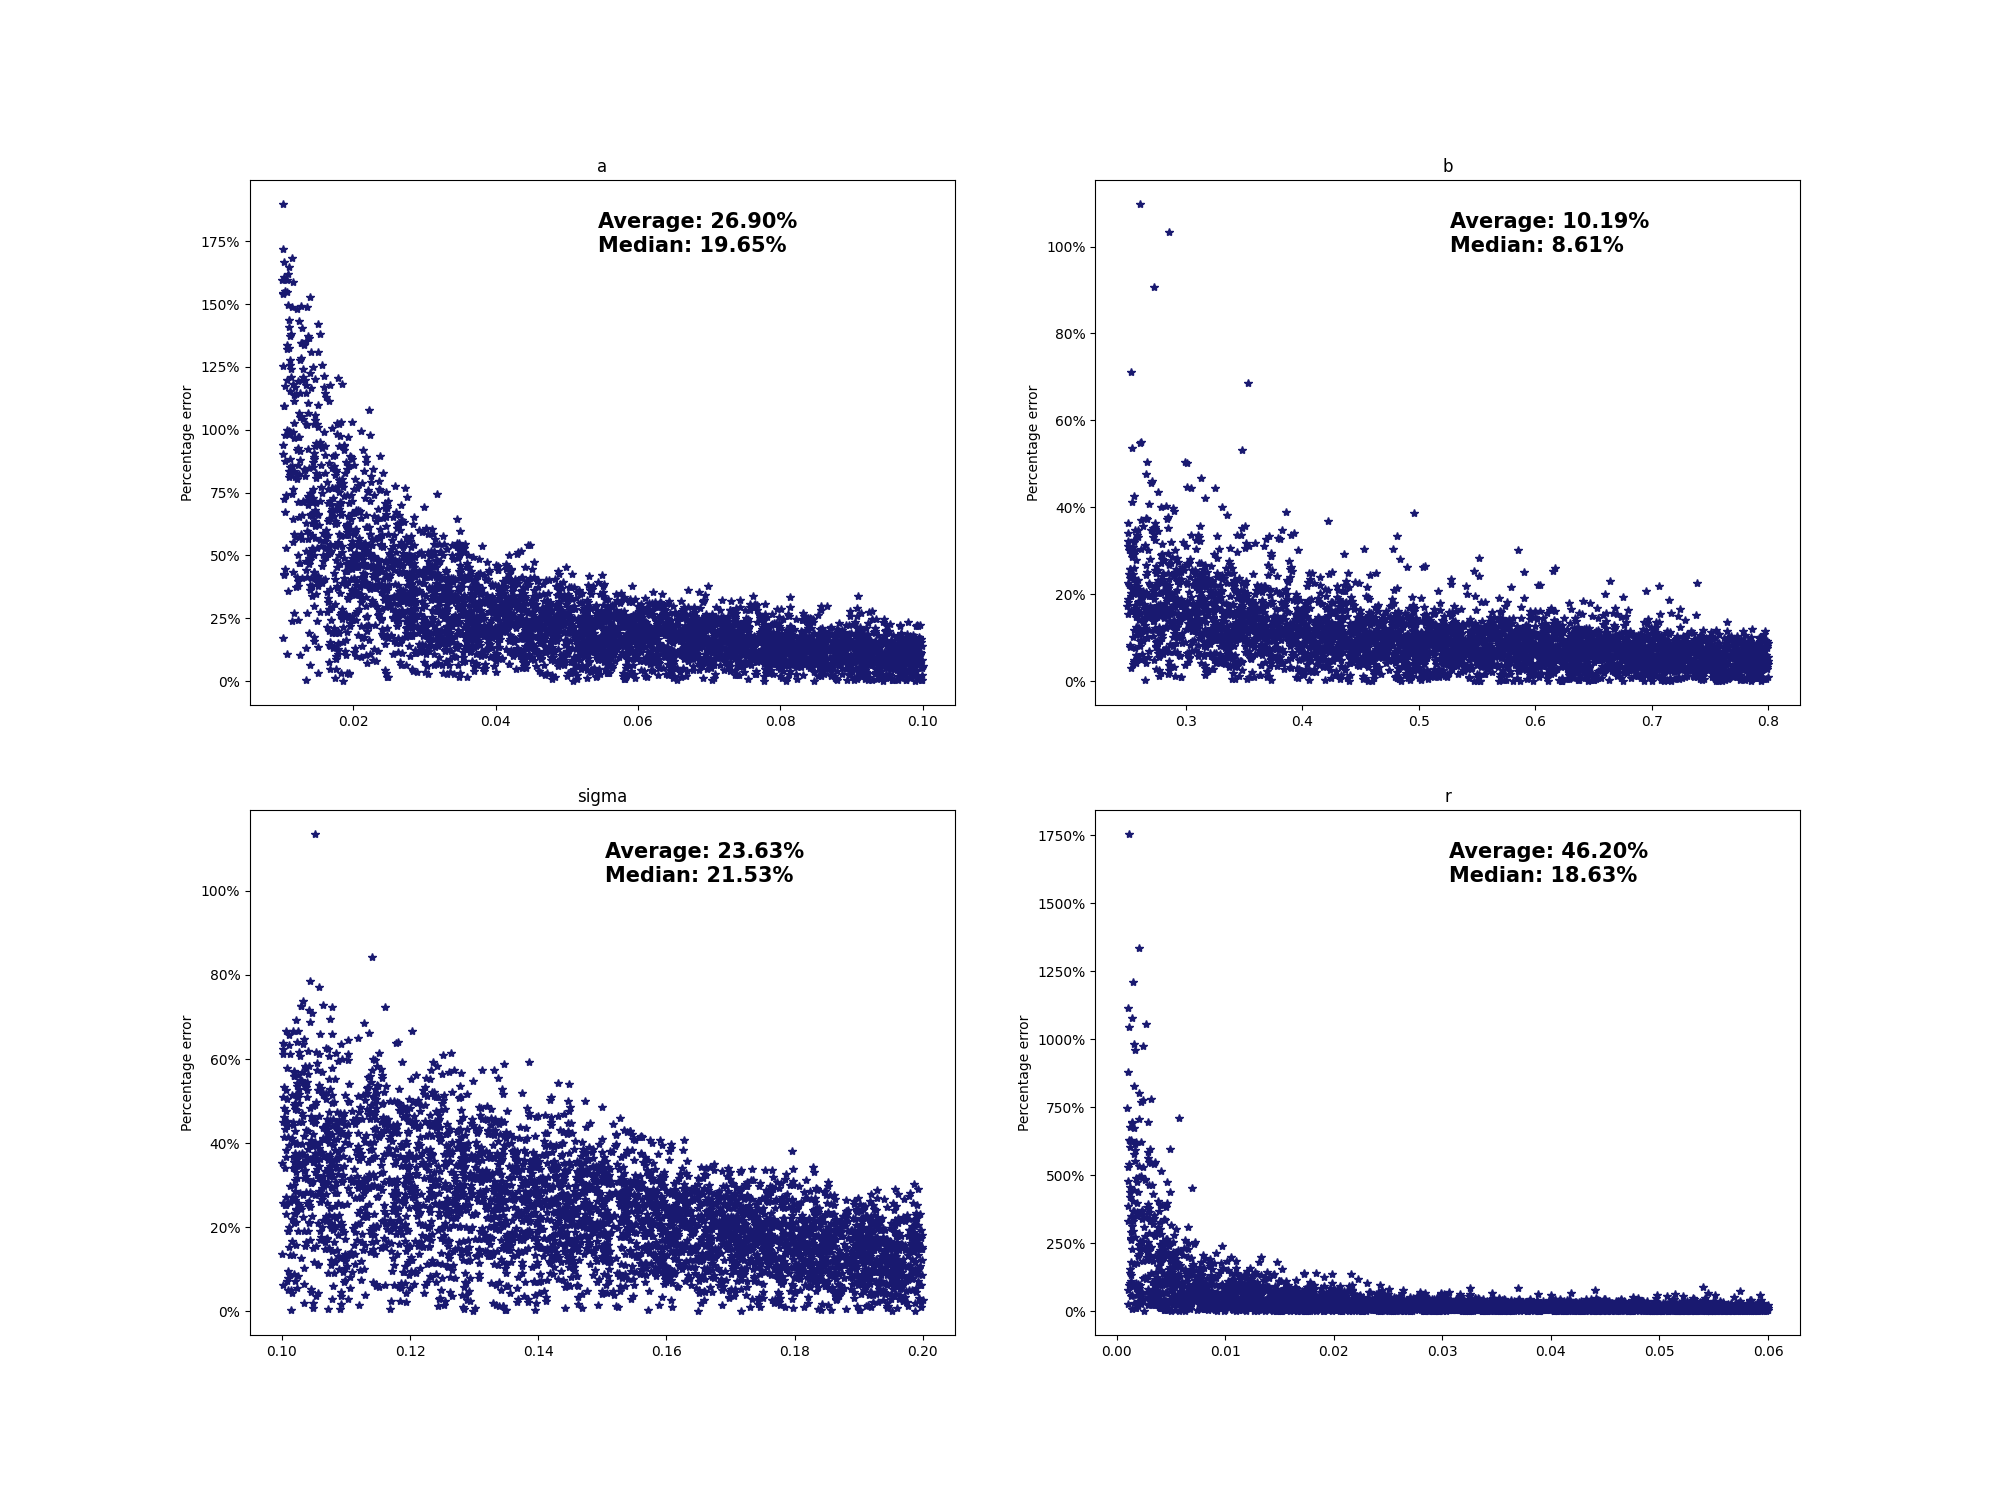

In [46]:
calibrate(model = model, prices = price_test, parameters = params_range_test, plot = True)

In [1]:
% load_ext autoreload
% autoreload 2

import os

path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
os.getcwd()

'/Users/samaypanwar/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Uni/FYP/FYP-Code'

In [2]:
from analysis.pointwise.model import init_model, load_weights, _calibrate_testing_

In [3]:
model = init_model()

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  224       
                                                                 
 dense_1 (Dense)             multiple                  1056      
                                                                 
 batch_normalization (BatchN  multiple                 128       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             multiple                  1056      
                                                                 
 dense_3 (Dense)             multiple                  33        
                                                                 
Total params: 2,497
Trainable params: 2,433
Non-trainable params: 64
____________________________________________________

In [86]:
load_weights(model)

2023-02-03 00:32:53,916 | INFO: | model.py | load_weights | 128: Weights loaded successfully
2023-02-03 00:32:53,916 | INFO: | model.py | load_weights | 128: Weights loaded successfully


2023-02-03 00:57:12,333 | INFO: | model.py | _calibrate_testing_ | 833: Beginning calibration for model dense with vasicek
2023-02-03 00:57:12,333 | INFO: | model.py | _calibrate_testing_ | 833: Beginning calibration for model dense with vasicek


100%|██████████| 1000/1000 [09:56<00:00,  1.68it/s]

2023-02-03 01:07:08,633 | INFO: | model.py | _calibrate_testing_ | 878: Calibration complete! change in parameters: 2.6382150090050427
2023-02-03 01:07:08,633 | INFO: | model.py | _calibrate_testing_ | 878: Calibration complete! change in parameters: 2.6382150090050427
2023-02-03 01:07:08,639 | INFO: | model.py | _calibrate_testing_ | 882: Saved parameters to file: data/pointwise/pointwise_params_calibrated_dense_vasicek.dat
2023-02-03 01:07:08,639 | INFO: | model.py | _calibrate_testing_ | 882: Saved parameters to file: data/pointwise/pointwise_params_calibrated_dense_vasicek.dat


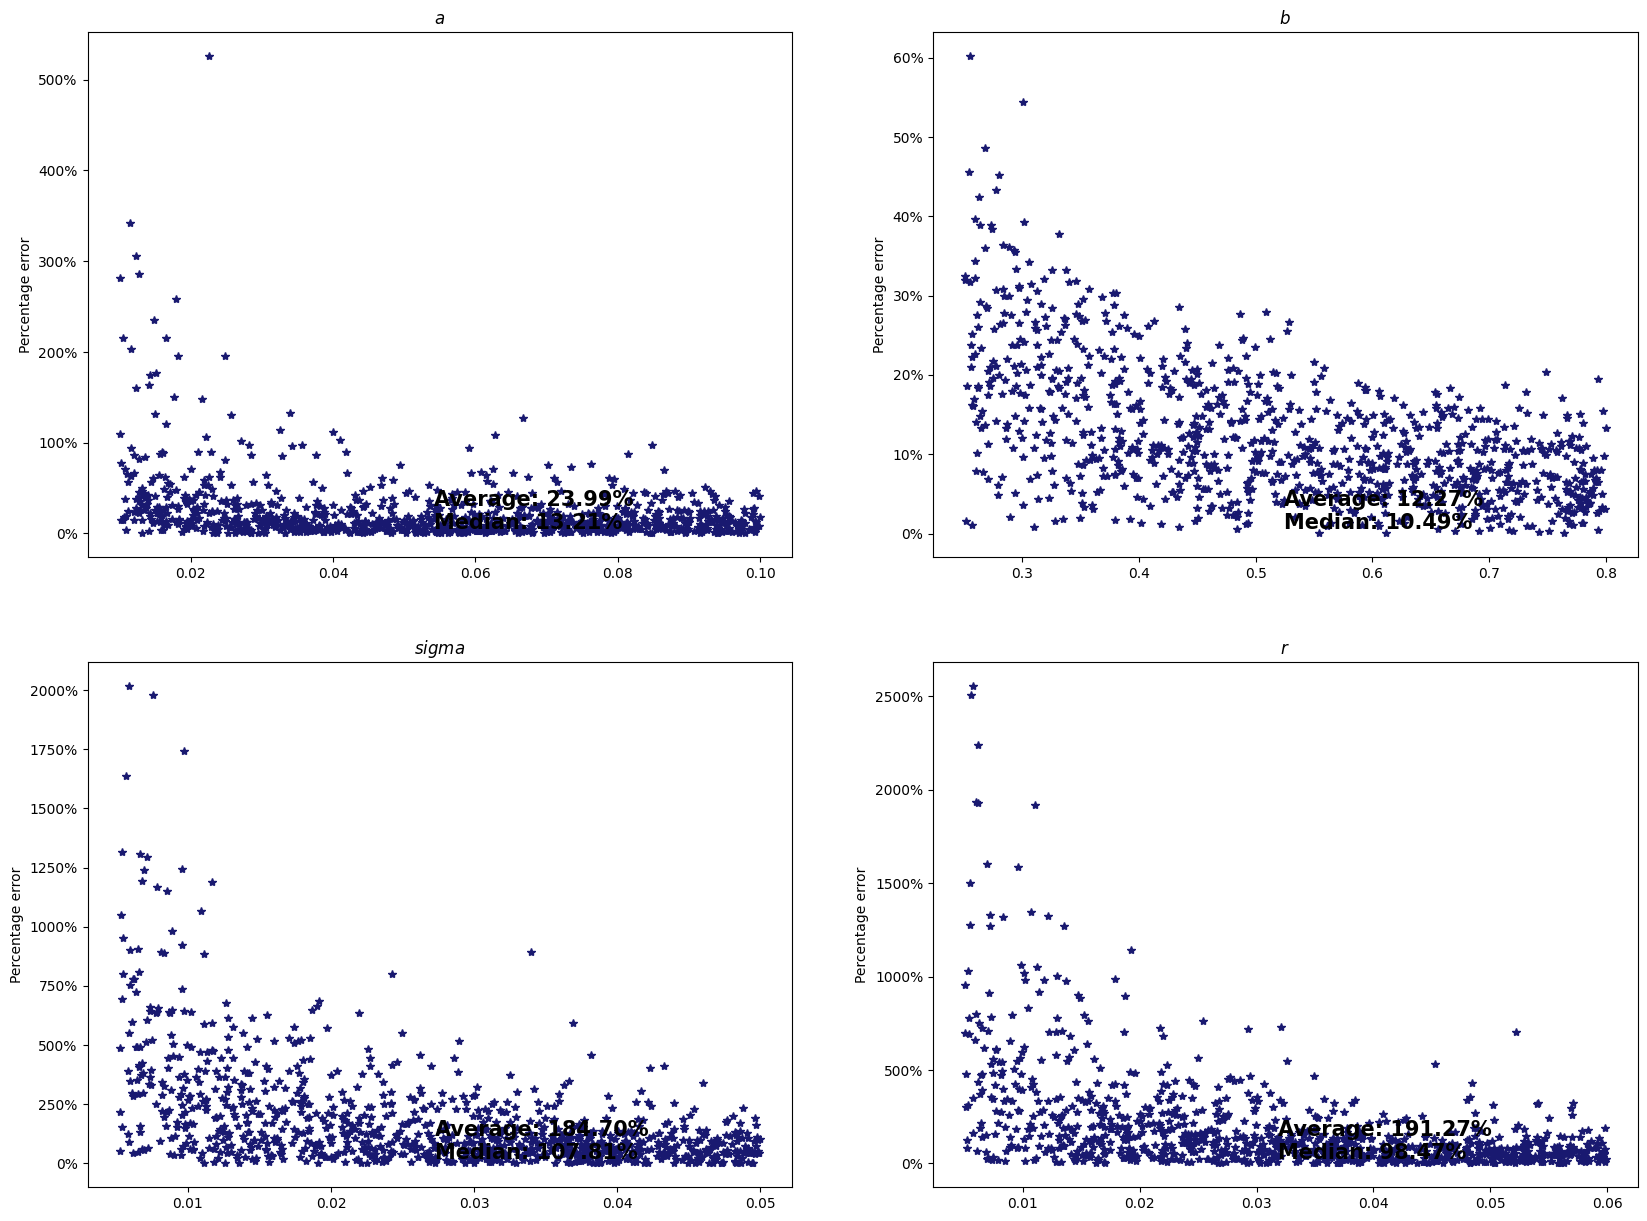

In [96]:
_calibrate_testing_(model, calibration_size = 1000, epochs = 1000, verbose_length = 500, plot = True)

In [37]:
from helper.synthesis import create_features_linspace

vector_ranges = {
        'c': [0, 0.1],
        'maturity': [1 / 24, 20],
        'a': [0.01, 0.1],
        'b': [0.25, 0.8],
        'sigma': [0.005, 0.05],
        'r': [0.005, 0.06]
        }

params_range = create_features_linspace(
        num = 15,
        vector_min = [vector_ranges[key][0] for key in sorted(vector_ranges.keys())],
        vector_max = [vector_ranges[key][1] for key in sorted(vector_ranges.keys())]
        )
params_range[:, [3, 2, 0, 1, 5, 4]]

array([[2.00000000e+01, 2.85714286e-02, 4.21428571e-02, 6.42857143e-01,
        1.78571429e-02, 5.00000000e-03],
       [1.42976190e+01, 6.42857143e-02, 2.28571429e-02, 6.03571429e-01,
        4.03571429e-02, 3.64285714e-02],
       [1.00208333e+01, 7.14285714e-03, 3.57142857e-02, 7.21428571e-01,
        2.42857143e-02, 2.85714286e-02],
       [4.16666667e-02, 4.28571429e-02, 4.85714286e-02, 3.67857143e-01,
        1.14285714e-02, 1.67857143e-02],
       [4.31845238e+00, 9.28571429e-02, 2.92857143e-02, 4.85714286e-01,
        3.07142857e-02, 6.00000000e-02],
       [1.28720238e+01, 7.85714286e-02, 5.50000000e-02, 5.25000000e-01,
        5.00000000e-03, 8.92857143e-03],
       [1.57232143e+01, 5.71428571e-02, 1.64285714e-02, 4.07142857e-01,
        4.35714286e-02, 4.82142857e-02],
       [1.71488095e+01, 7.14285714e-02, 7.42857143e-02, 2.50000000e-01,
        8.21428571e-03, 2.07142857e-02],
       [7.16964286e+00, 5.00000000e-02, 1.00000000e-02, 8.00000000e-01,
        3.39285714e-02, 

In [49]:
np.concatenate(
    np.zeros(shape = (10, 2)), np.random.rand(10, 4) * np.array(
            [0.05] * (4)
            )
    )

TypeError: only integer scalar arrays can be converted to a scalar index

In [52]:
x = np.zeros(shape = (10, 2))
y = np.random.rand(10, 4) * np.array(
        [0.05] * 4
        )


In [57]:
np.concatenate((x, y), axis = 1)

array([[0.        , 0.        , 0.00467823, 0.03153329, 0.04967705,
        0.00461952],
       [0.        , 0.        , 0.0214898 , 0.01450417, 0.0037562 ,
        0.01053637],
       [0.        , 0.        , 0.04403254, 0.03529122, 0.00795101,
        0.03770573],
       [0.        , 0.        , 0.00484623, 0.00655931, 0.01258254,
        0.04273974],
       [0.        , 0.        , 0.03059911, 0.00993298, 0.00653856,
        0.00615079],
       [0.        , 0.        , 0.02064293, 0.01727041, 0.01633535,
        0.0452436 ],
       [0.        , 0.        , 0.02388905, 0.00584726, 0.01308004,
        0.00991483],
       [0.        , 0.        , 0.01544933, 0.01297511, 0.02599697,
        0.02058843],
       [0.        , 0.        , 0.04842315, 0.01741225, 0.03005694,
        0.03365863],
       [0.        , 0.        , 0.02081281, 0.00453888, 0.0439213 ,
        0.02873512]])

In [72]:
from helper.synthesis import generate_pointwise_data

In [73]:
generate_pointwise_data()

100%|██████████| 60000/60000 [00:00<00:00, 207213.78it/s]


Data successfully generated!


In [74]:
from analysis.pointwise.model import train_model

In [83]:
model.reset_states()

In [84]:
model = init_model()
# model.weights

Model: "dense_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            multiple                  224       
                                                                 
 dense_13 (Dense)            multiple                  1056      
                                                                 
 batch_normalization_3 (Batc  multiple                 128       
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            multiple                  1056      
                                                                 
 dense_15 (Dense)            multiple                  33        
                                                                 
Total params: 2,497
Trainable params: 2,433
Non-trainable params: 64
__________________________________________________

2023-02-03 00:28:26,501 | INFO: | model.py | train_model | 221: Beginning training for model dense with vasicek
2023-02-03 00:28:26,501 | INFO: | model.py | train_model | 221: Beginning training for model dense with vasicek


100%|██████████| 200/200 [03:10<00:00,  1.05it/s]

2023-02-03 00:31:37,388 | INFO: | model.py | train_model | 270: Saved weights to file: weights/pointwise/pointwise_weights_dense_vasicek.h5
2023-02-03 00:31:37,388 | INFO: | model.py | train_model | 270: Saved weights to file: weights/pointwise/pointwise_weights_dense_vasicek.h5


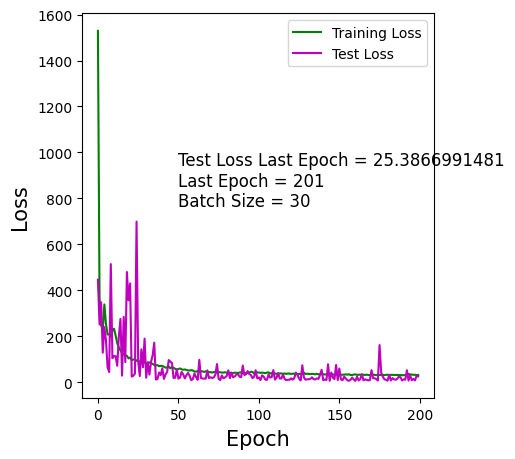

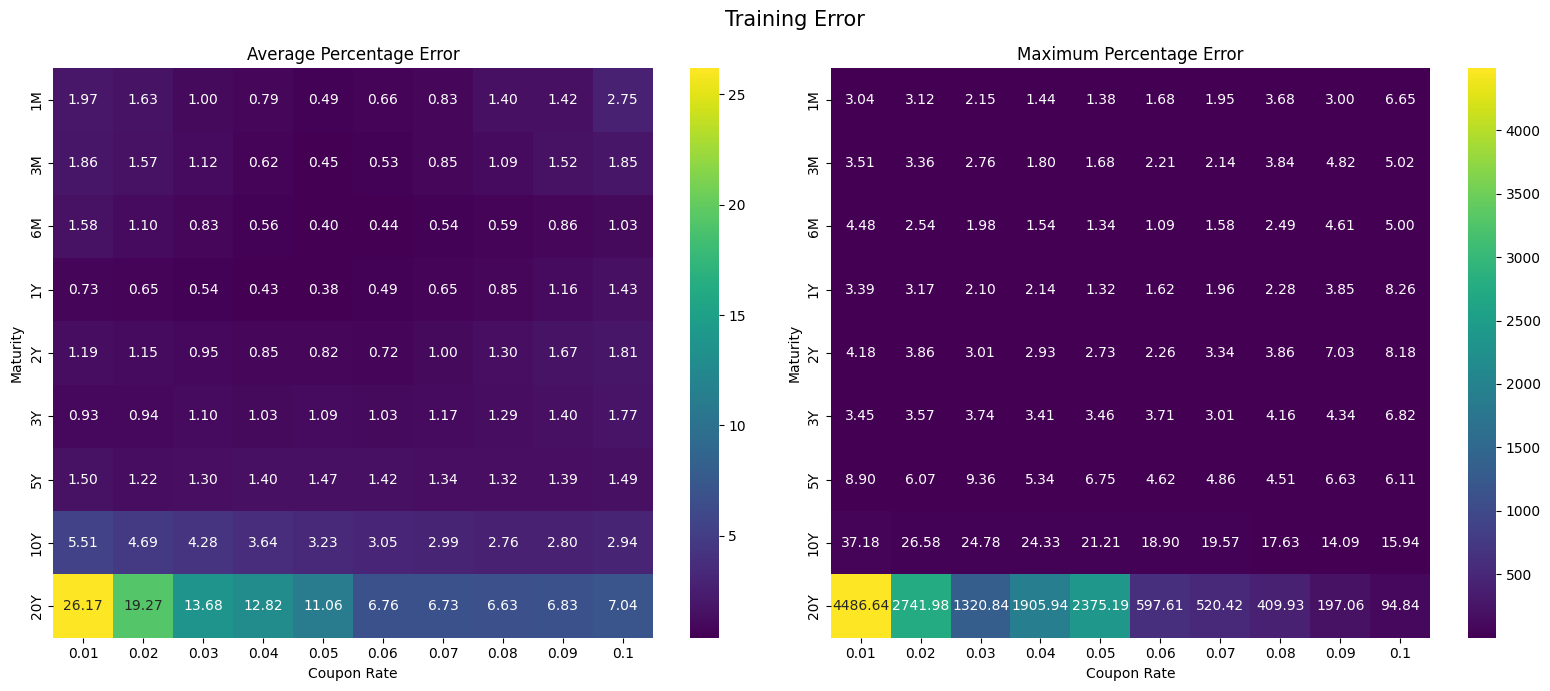

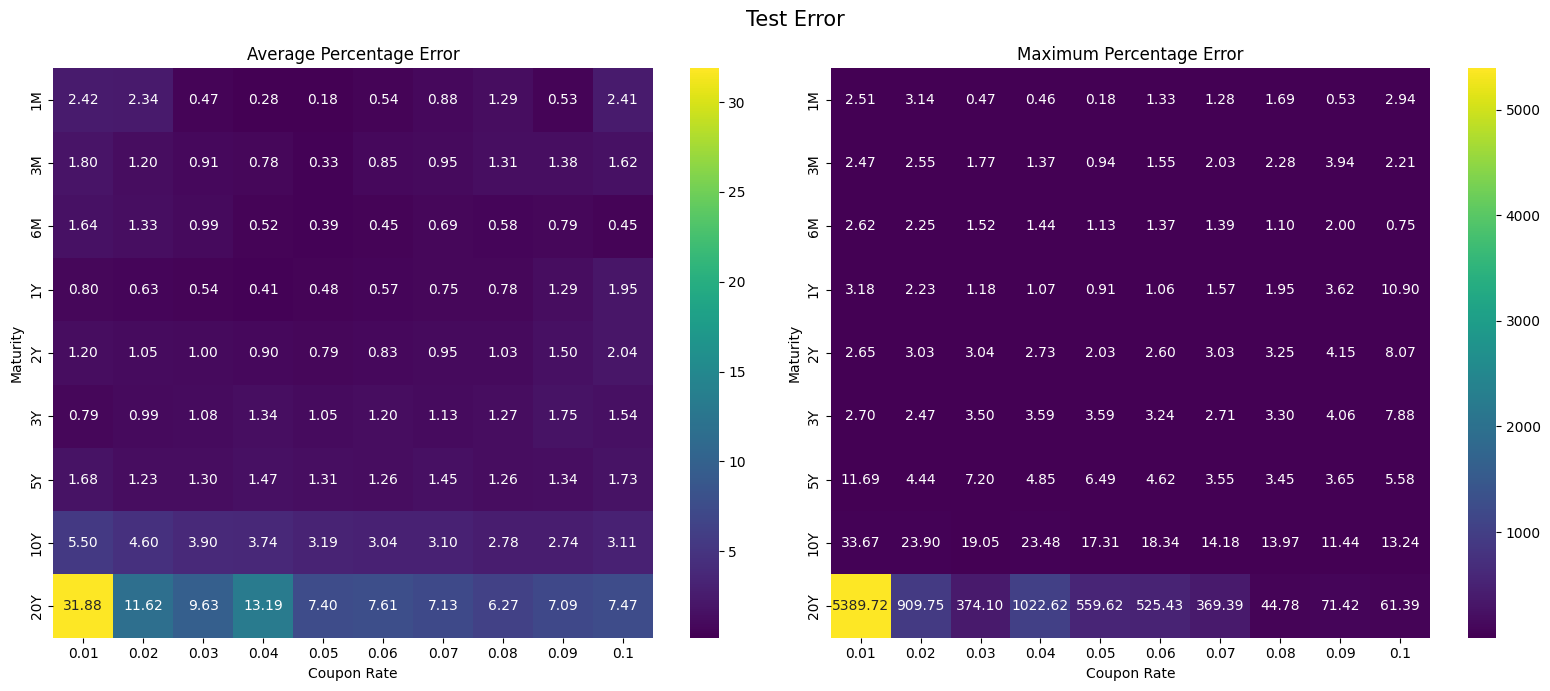

In [85]:
train_model(model = model, epochs = 200)

In [2]:
%load_ext autoreload
%autoreload 2

import os

path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
os.getcwd()

'/Users/samaypanwar/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Uni/FYP/FYP-Code'

In [3]:
def bond_price(par, T, ytm, coup, freq=2):
    freq = float(freq)
    periods = T*freq
    coupon = coup*par/freq
    dt = [(i+1)/freq for i in range(int(periods))]
    price = sum([coupon/(1+ytm/freq)**(freq*t) for t in dt]) + \
            par/(1+ytm/freq)**(freq*T)
    return price

In [4]:
bond_price(par = 100, T = 1, ytm = 0.02, coup = 0.04, freq = 1)

144.79291110200876

In [92]:
import pandas as pd
import numpy as np

df = pd.read_csv("market_data/United States 30-Year Bond Yield Historical Data.csv")
df.columns = [x.strip() for x in df.columns]
df = df[['Date','Price']]
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace = True)
df = df[::-1]
df

Price
Date             
2022-01-26  2.175
2022-01-27  2.091
2022-01-28  2.080
2022-01-30  2.092
2022-01-31  2.116
...           ...
2023-01-22  3.663
2023-01-23  3.686
2023-01-24  3.604
2023-01-25  3.596
2023-01-26  3.594

[302 rows x 1 columns]

In [93]:
df['Time to Expiry'] = (pd.to_datetime("2052-11-15") - df.index).days / 365
df

Price  Time to Expiry
Date                             
2022-01-26  2.175       30.824658
2022-01-27  2.091       30.821918
2022-01-28  2.080       30.819178
2022-01-30  2.092       30.813699
2022-01-31  2.116       30.810959
...           ...             ...
2023-01-22  3.663       29.835616
2023-01-23  3.686       29.832877
2023-01-24  3.604       29.830137
2023-01-25  3.596       29.827397
2023-01-26  3.594       29.824658

[302 rows x 2 columns]

In [94]:
df['Bond Price'] = df.apply(lambda x: bond_price(par = 100, T = x[1], ytm = x[0] / 100, coup = 4 / 100, freq = 2), axis=1)

df.to_csv("market_data/30Y_cleaned.csv")

In [95]:
df['Bond Price'].std() / df['Bond Price'].mean()

0.10833241466214465

In [96]:
df

Price  Time to Expiry  Bond Price
Date                                         
2022-01-26  2.175       30.824658  140.169322
2022-01-27  2.091       30.821918  142.534251
2022-01-28  2.080       30.819178  142.850387
2022-01-30  2.092       30.813699  142.514836
2022-01-31  2.116       30.810959  141.837959
...           ...             ...         ...
2023-01-22  3.663       29.835616  105.631948
2023-01-23  3.686       29.832877  105.207052
2023-01-24  3.604       29.830137  106.748294
2023-01-25  3.596       29.827397  106.903353
2023-01-26  3.594       29.824658  106.944694

[302 rows x 3 columns]

In [ ]:
expiries = {
        "1M": "2023-03-07",
        "3M": "2023-05-04",
        '6M': "2023-08-03",
        '1Y': "2024-01-25",
        '2Y': "2025-01-31",
        "3Y": "2026-01-15",
        "5Y": "2028-01-31",
        '10Y': "2032-11-15",
        '20Y': "2042-11-15",
        "30Y": "2052-11-15"
        }

coupons = {
        "1M": 0,
        '3M': 0,
        "6M": 0,
        "1Y": 0,
        '2Y': 4.125 / 100,
        '3Y': 3.875 / 100,
        '5Y': 3.5 / 100,
        '10Y': 4.125 / 100,
        '20Y': 4 / 100,
        '30Y': 4 / 100
        }

In [97]:
from analysis.pointwise.model import calibrate_to_market_data, init_model, load_weights

In [98]:
model = init_model()

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  224       
                                                                 
 dense_1 (Dense)             multiple                  1056      
                                                                 
 batch_normalization (BatchN  multiple                 128       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             multiple                  1056      
                                                                 
 dense_3 (Dense)             multiple                  33        
                                                                 
Total params: 2,497
Trainable params: 2,433
Non-trainable params: 64
____________________________________________________

In [99]:
load_weights(model)

2023-02-03 18:40:30,211 | INFO: | model.py | load_weights | 127: Weights loaded successfully
2023-02-03 18:40:30,211 | INFO: | model.py | load_weights | 127: Weights loaded successfully


In [112]:
initial_parameters = np.array([0.04, 0.01, 0.4, 0.1, 0.02], dtype=np.float64)
calibrate_to_market_data(model = model, market_data = df['Bond Price'], initial_parameters = initial_parameters, time_to_expiry = df['Time to Expiry'], verbose_length = 50, epochs = 100)

2023-02-03 18:50:44,460 | INFO: | model.py | calibrate_to_market_data | 622: Beginning calibration for model dense with vasicek
2023-02-03 18:50:44,460 | INFO: | model.py | calibrate_to_market_data | 622: Beginning calibration for model dense with vasicek


100%|██████████| 302/302 [00:30<00:00,  9.94it/s]

2023-02-03 18:51:14,833 | INFO: | model.py | calibrate_to_market_data | 674: Calibration complete! change in parameters: 0.06432211224315028
2023-02-03 18:51:14,833 | INFO: | model.py | calibrate_to_market_data | 674: Calibration complete! change in parameters: 0.06432211224315028
2023-02-03 18:51:14,838 | INFO: | model.py | calibrate_to_market_data | 679: Saved parameters to file: data/pointwise/pointwise_params_calibrated_dense_vasicek.dat
2023-02-03 18:51:14,838 | INFO: | model.py | calibrate_to_market_data | 679: Saved parameters to file: data/pointwise/pointwise_params_calibrated_dense_vasicek.dat


In [103]:
type(df['Time to Expiry'][0])

numpy.float64

In [120]:
calib = pd.read_table("data/pointwise/pointwise_params_market_calibrated_dense_vasicek.dat", sep = " ", header = None)

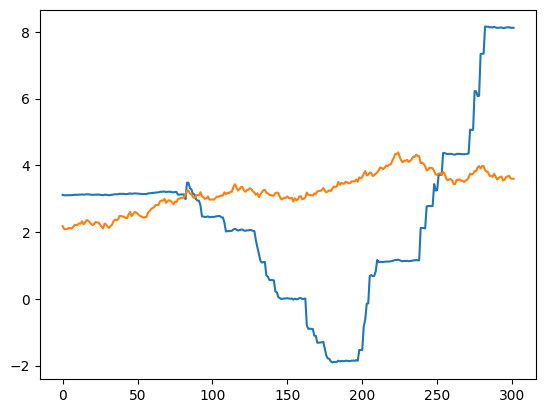

In [134]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
(100*calib.loc[:, 5]).plot(ax=ax)
ax.plot(df.Price.tolist())

[2.175,
 2.091,
 2.08,
 2.092,
 2.116,
 2.117,
 2.106,
 2.156,
 2.213,
 2.206,
 2.218,
 2.26,
 2.251,
 2.323,
 2.234,
 2.285,
 2.362,
 2.342,
 2.297,
 2.242,
 2.209,
 2.242,
 2.302,
 2.283,
 2.285,
 2.218,
 2.159,
 2.109,
 2.254,
 2.226,
 2.162,
 2.124,
 2.184,
 2.219,
 2.331,
 2.373,
 2.354,
 2.379,
 2.481,
 2.484,
 2.463,
 2.461,
 2.421,
 2.421,
 2.52,
 2.603,
 2.48,
 2.532,
 2.602,
 2.589,
 2.55,
 2.503,
 2.48,
 2.453,
 2.435,
 2.445,
 2.456,
 2.582,
 2.623,
 2.685,
 2.721,
 2.739,
 2.805,
 2.806,
 2.812,
 2.919,
 2.94,
 2.946,
 2.993,
 2.874,
 2.927,
 2.951,
 2.938,
 2.886,
 2.835,
 2.913,
 2.902,
 2.996,
 3.0,
 3.029,
 3.018,
 3.04,
 3.119,
 3.238,
 3.241,
 3.156,
 3.127,
 3.045,
 3.023,
 3.088,
 3.108,
 3.103,
 3.194,
 3.07,
 3.049,
 2.993,
 3.012,
 3.065,
 2.97,
 2.975,
 2.974,
 2.971,
 3.019,
 3.056,
 3.062,
 3.079,
 3.095,
 3.094,
 3.191,
 3.131,
 3.177,
 3.165,
 3.203,
 3.207,
 3.355,
 3.431,
 3.333,
 3.243,
 3.282,
 3.345,
 3.349,
 3.248,
 3.206,
 3.265,
 3.266,
 3.314,
 3.2